In [ ]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import itertools
import random

In [2]:
def organize_data():
    dfs = {}
    players = ['Chris', 'Arian', 'James', 'Harish', 'Daniel', 'Joey']
    for player in players:
        dfs[player] = pd.read_csv(player+'_fantasy.csv')
    dfs['league'] = pd.DataFrame()
    for player in players:
        dfs['league'] = pd.concat([dfs['league'], dfs[player]], ignore_index=True)
    league = dfs['league']
    return dfs

In [38]:
def make_swarms(dfs={}):
    
    metrics = [column for column in dfs['league'].columns.values if column not in ['Week', 'Player']]
    
    colors = []
    r = lambda: random.randint(0,255)
    for i in range(dfs['league']['Player'].nunique()):
        colors.append('#%02X%02X%02X' % (r(),r(),r()))
    players_colors = dict(zip(dfs['league']['Player'].unique(), colors))
    
    for metric in metrics:
        fig = plt.figure(figsize=(8,6))
        ax = fig.add_subplot(111)
        sns.swarmplot('Player', metric, data=dfs['league'], order= dfs['league'].groupby('Player').sum()[metric].sort_values(ascending=False).index.values, palette=players_colors)
        plt.title(metric)


In [39]:
dfs = organize_data()

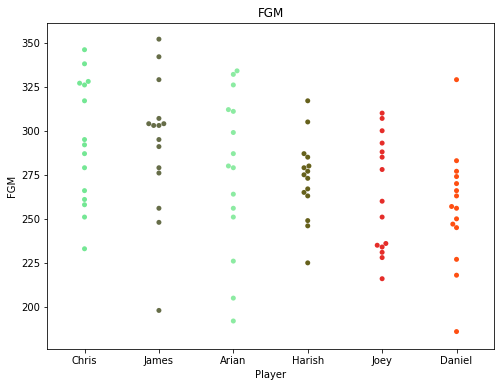

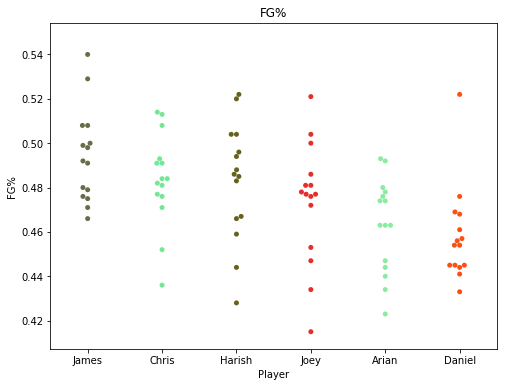

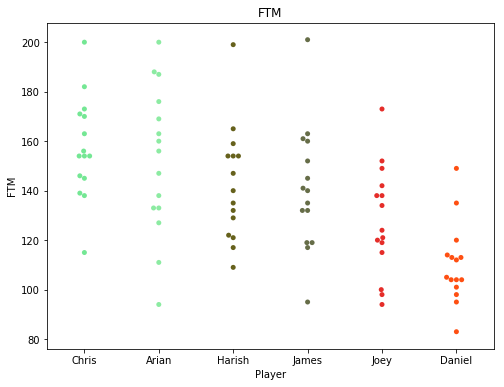

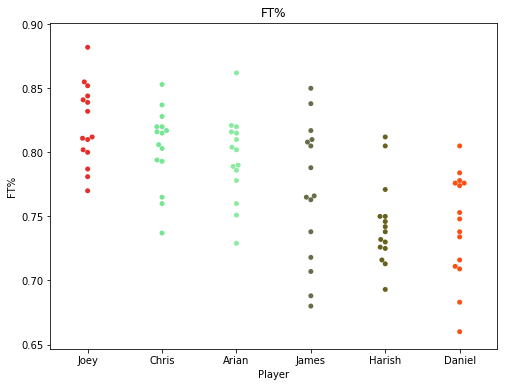

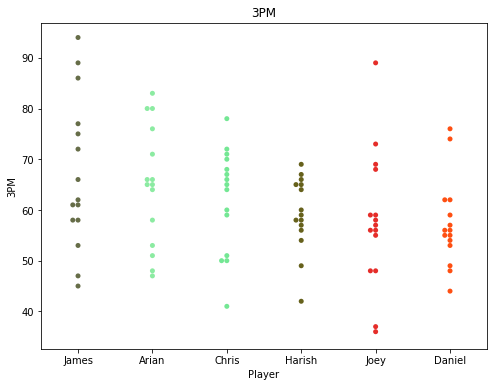

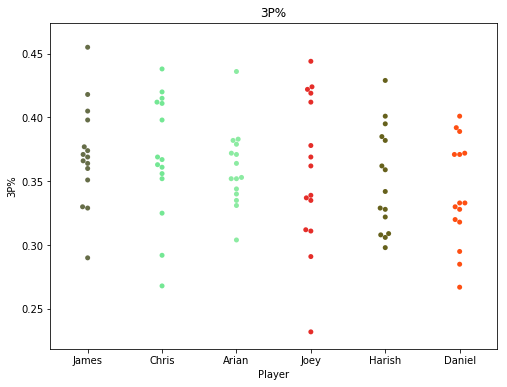

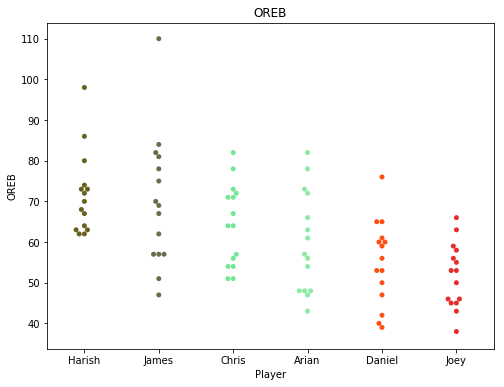

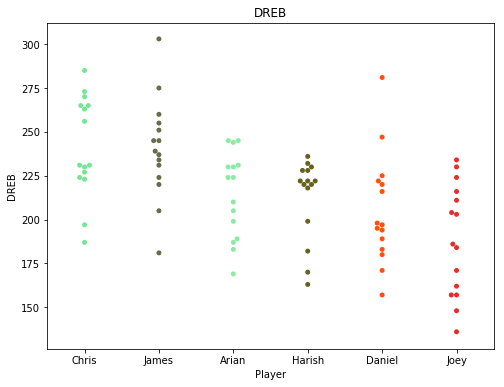

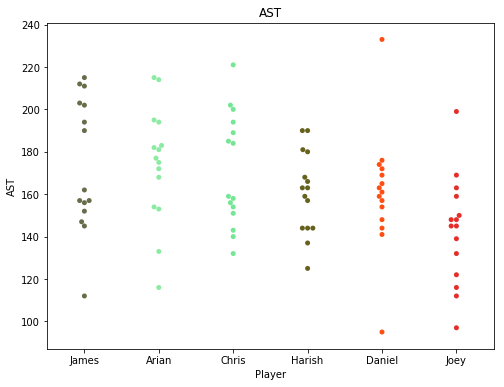

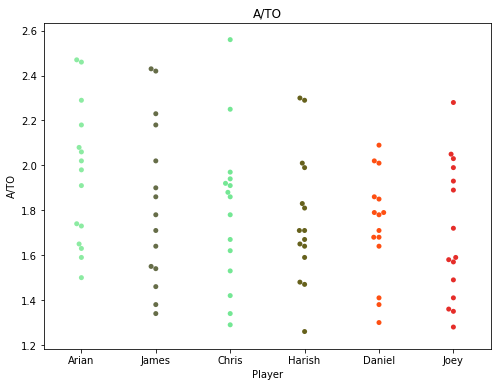

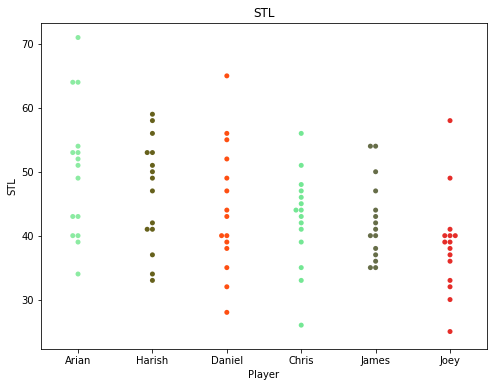

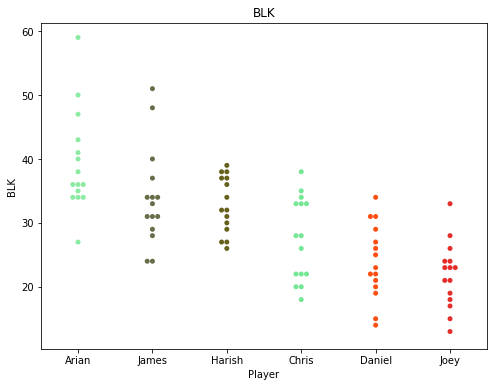

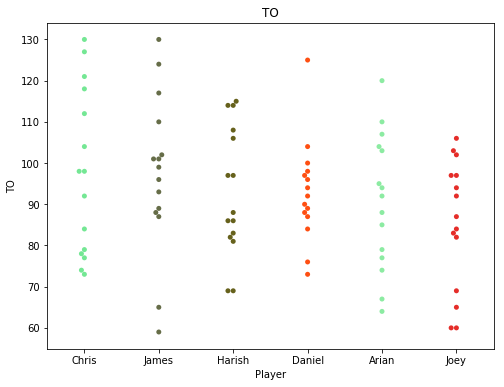

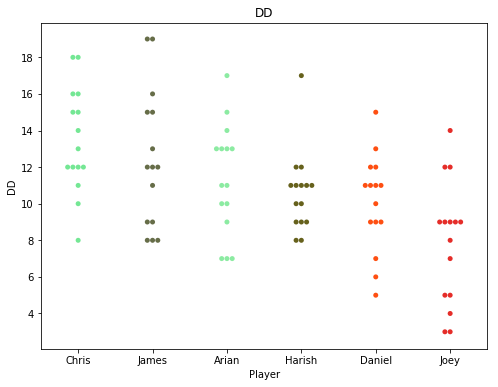

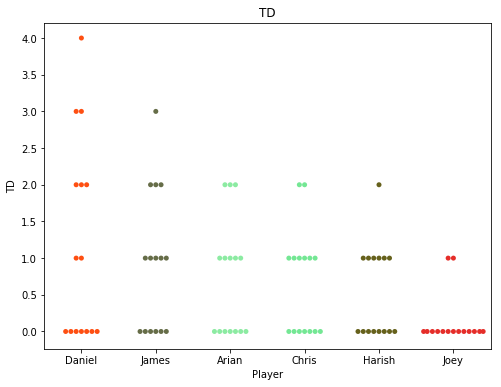

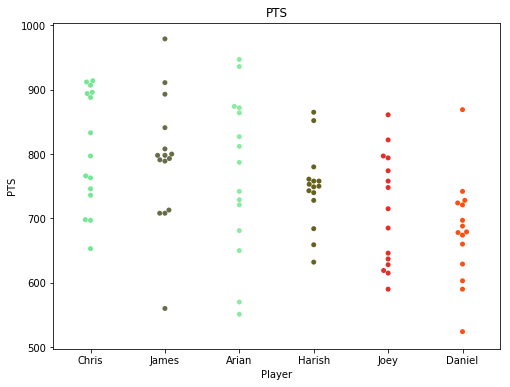

In [40]:
make_swarms(dfs)

In [37]:
[column for column in dfs['league'].columns.values if column not in ['Week', 'Player']]

['FGM',
 'FG%',
 'FTM',
 'FT%',
 '3PM',
 '3P%',
 'OREB',
 'DREB',
 'AST',
 'A/TO',
 'STL',
 'BLK',
 'TO',
 'DD',
 'TD',
 'PTS']